In [1]:
FULL_NAMES = {
    3: 'Gypsum',
    4: 'Ferric Hydroxysulfate',
    5: "Hematite",
    6: 'Nontronite',
    7: 'Saponite',
    8: 'Prehnite',  # Prehnite Zeolite
    9: 'Jarosite',
    10: 'Serpentine',
    11: 'Alunite',
    13: 'Ca/Fe CO3',  # Calcite, Ca/Fe carbonate
    14: 'Beidellite',
    15: 'Kaolinite',
    16: 'Bassanite',
    17: 'Epidote',
    18: 'Montmorillonite',
    20: 'Mg Cl salt',  # Mg(ClO3)2.6H2O
    21: 'Halloysite',
    22: 'Epsomite',
    23: 'Illite/Muscovite',
    24: 'Margarite',
    25: 'Analcime',  # Zeolite
    26: 'Monohydrated sulfate',  # Szomolnokite
    30: 'MgCO3',  # Magnesite
    31: 'Chlorite',
    32: 'Clinochlore',
    33: 'Low Ca Pyroxene',
    34: 'Olivine Forsterite',
    35: 'High Ca Pyroxene',
    36: 'Olivine Fayalite',
}

NEW_NAMES = {
    1: "Hematite",
    2: 'Nontronite',
    3: 'Saponite',
    4: 'Prehnite',  # Prehnite Zeolite
    5: 'Jarosite',
    6: 'Serpentine',
    7: 'Alunite',
    8: 'Calcite',  # Calcite, Ca/Fe carbonate
    9: 'Beidellite',
    10: 'Kaolinite',
    11: 'Bassanite',
    12: 'Epidote',
    13: 'Montmorillonite',
    14: 'Mg Cl salt',  # Mg(ClO3)2.6H2O
    15: 'Halloysite',
    16: 'Epsomite',
    17: 'Illite/Muscovite',
    18: 'Analcime',  # Zeolite
    19: 'Monohydrated sulfate',  # Szomolnokite
    20: 'MgCO3',  # Magnesite
    21: 'Clinochlore',
    22: 'Low Ca Pyroxene',
    23: 'Olivine Forsterite',
    24: 'High Ca Pyroxene',
    25: 'Olivine Fayalite',
}

In [2]:
from scipy.io import loadmat as _loadmat
import pandas as pd
from tqdm import tqdm
import random

# open .mat files
data = _loadmat(r'C:\Users\jourd\OneDrive\Documents\UCL\Masters_Dissertation\Python\Crism_ml_validation\crism_ml-master\datasets\CRISM_labeled_pixels_ratioed.mat')
labs, spectra = [data['pixlabs'], data['pixspec']]

import matplotlib.pyplot as plt
import numpy as np

indices = []
value = np.arange(0,39)
master_spectra = []
for val in tqdm(value):
    indices_ = []
    spectra_ = []
    for i in range(len(labs)):
        if labs[i] == val:
            spectra_.append(spectra[i])
    spectra_ = np.asarray(spectra_)
    master_spectra.append(spectra_)

master_spectra = np.asarray(master_spectra)

selected = list(FULL_NAMES.keys())

# select only the selected indies from master_spectra
master_spectra = master_spectra[selected]

100%|██████████| 39/39 [01:02<00:00,  1.60s/it]
C:\Users\jourd\AppData\Local\Temp\ipykernel_10908\2188018531.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  master_spectra = np.asarray(master_spectra)


In [3]:
# create a list of the indices of the master spectra
index_list = []


# loop through master spectra
for i in range(len(master_spectra)):
    # get the length of master_spectra[i] and create a list of that many element of value i
    l = len(master_spectra[i])
    index = [i] * l
    index = np.array(index)
    index_list.append(index)

index_list = np.array(index_list)

# flatten the array
flat_index_list = [item for sublist in index_list for item in sublist]
flat_spectra = [item for sublist in master_spectra for item in sublist]

C:\Users\jourd\AppData\Local\Temp\ipykernel_10908\2390577800.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  index_list = np.array(index_list)


In [4]:
import random
flat_index_list = np.array(flat_index_list)
flat_spectra = np.array(flat_spectra)
flat_spectra_ = flat_spectra[:,4:244]
flat_spectra_.shape

(492835, 240)

In [5]:

# Shuffle 
# Zipping the two lists together
zipped = list(zip(flat_spectra_, flat_index_list))

# Shuffling the zipped list
random.shuffle(zipped)

# Unzipping the shuffled list back into two lists
flat_spectra_shuffled, flat_index_shuffled = zip(*zipped)
flat_spectra_shuffled_ = np.array(flat_spectra_shuffled[:490000])
flat_index_shuffled_ = np.array(flat_index_shuffled[:490000])

In [8]:
# Add noise 

flat_spectra_shuffled_noise = add_noise(flat_spectra_shuffled_, 0.003)


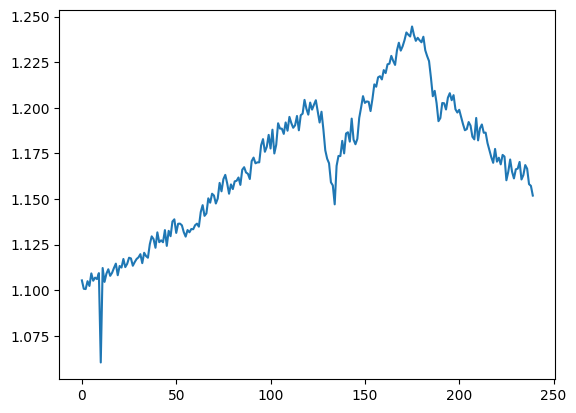

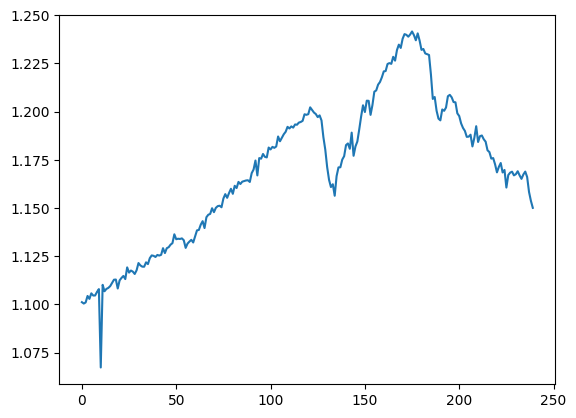

In [9]:
lo = 1000
plt.plot(flat_spectra_shuffled_noise[lo])
plt.show()
plt.plot(flat_spectra_shuffled_[lo])

In [10]:
# reshape the image into a 2D array of pixels
# 562500

flat_spectra_shuffled_img = flat_spectra_shuffled_noise.reshape((700,700,240))
flat_index_shuffled_img = flat_index_shuffled_.reshape((700,700))

In [13]:
from sklearn.metrics.pairwise import cosine_similarity as cosineDist

exemplars = np.random.rand(24, 240)
imgPreds = np.asarray(flat_spectra_shuffled_noise)
'Find the cosine distance between the exemplars and the data'

dist = np.squeeze(cosineDist(exemplars, imgPreds))


In [22]:
simMap = np.zeros((700, 700, exemplars.shape[0]))
for em in range(exemplars.shape[0]):
    distMap = np.squeeze(dist[em, :])
    distMap = distMap.reshape((700, 700))
    simMap[0:700, 0:700, em] = distMap


In [25]:
simMap[200,200]

array([0.85920066, 0.88681376, 0.85189   , 0.86816724, 0.83887627,
       0.86238116, 0.8542148 , 0.85971306, 0.85407234, 0.87964031,
       0.8565882 , 0.88286285, 0.85371778, 0.8790669 , 0.85999356,
       0.87222348, 0.84882625, 0.87922863, 0.85358238, 0.86757166,
       0.87183628, 0.84886537, 0.86880737, 0.88398487])

In [ ]:
from spectral.io import envi
# save images to envi

envi.save_image('validation_spectra/validation_spectra_noise.hdr', flat_spectra_shuffled_img, dtype=np.float64, force=True, interleave='bil')
envi.save_image('validation_spectra/validation_labels_noise.hdr', flat_index_shuffled_img, dtype=np.float64, force=True, interleave='bil')

In [7]:
def add_noise(spectra_flat, noise_level =0.1):
    """
    Add noise to the spectra
    """

    spectra_flat = spectra_flat + noise_level * np.random.randn(*spectra_flat.shape)
    return spectra_flat

In [1]:
t = flat_spectra_shuffled_img[100,100]
plt.plot(t)

NameError: name 'flat_spectra_shuffled_img' is not defined